In [1]:
import pandas as pd

cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data.drop('Unnamed: 0', 1, inplace=True)

In [2]:
cleaned_data.rename({'y_yes': 'subscribed_deposit'}, axis=1, inplace=True)

In [3]:
cleaned_data

,subscribed_deposit,age,balance,duration,campaign,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
0,0,58,2143,261,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,44,29,151,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,0,33,2,76,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,0,47,1506,92,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,35,231,139,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,0,28,447,217,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
6,0,42,2,380,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
7,0,58,121,50,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,43,593,55,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
9,0,41,270,222,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [4]:
#Split data into dependent and independent variables

cleaned_data_y = cleaned_data.loc[:, cleaned_data.columns == 'age']
cleaned_data_x = cleaned_data.loc[:, cleaned_data.columns != 'age']

In [5]:
#Check missing values for independent variables
cleaned_data_x.isna().sum()

subscribed_deposit     0
balance                0
duration               0
campaign               0
previous               0
marital_married        0
marital_single         0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
education_secondary    0
education_tertiary     0
default_yes            0
housing_yes            0
loan_yes               0
dtype: int64

In [6]:
#Split Data into training and testing groups
#We will have to standardize the numeric independent variables
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cleaned_data_x, cleaned_data_y, test_size=0.1, random_state= 1254)

In [7]:
#Isolate training numeric independent variables
x_train_numeric = x_train.iloc[:,:5]

#Isolate tersting numeric independent variables
x_test_numeric = x_test.iloc[:,:5]

In [8]:
#Apply standard scalar
#Not Needed fo logistic Regression
import sklearn
from sklearn.preprocessing import StandardScaler

scalar = sklearn.preprocessing.StandardScaler()

scalar_x_train_numeric = pd.DataFrame(scalar.fit_transform(x_train_numeric), index =x_train_numeric.index, columns=x_train_numeric.columns[0:5], )
scalar_x_test_numeric = pd.DataFrame(scalar.transform(x_test_numeric), index = x_test_numeric.index, columns=x_test_numeric.columns[0:5])

In [9]:
x_train

,subscribed_deposit,balance,duration,campaign,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
28901,0,587,186,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12626,0,2220,87,2,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
44548,0,889,13,1,6,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
20561,0,111,78,2,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2809,0,51,824,2,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2268,0,27,299,5,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1471,0,0,345,2,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
29468,0,483,288,3,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
442,0,228,136,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
33374,0,2374,316,2,2,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
#Merge standardized numerical independent variables with categorical independent variables
x_train_complete = pd.merge(scalar_x_train_numeric, x_train.iloc[:,5:], how = 'left', left_index=True, right_index=True)
x_test_complete = pd.merge(scalar_x_test_numeric, x_test.iloc[:,5:], how = 'left', left_index=True, right_index=True)

In [11]:
#Check x training data
x_train_complete.head(3)

,subscribed_deposit,balance,duration,campaign,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
28901,-0.365171,-0.255399,-0.281311,-0.566541,-0.248662,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12626,-0.365171,0.279103,-0.664779,-0.245122,-0.248662,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
44548,-0.365171,-0.156551,-0.951412,-0.566541,2.312930,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


## Modeling

### Correlation plot

<AxesSubplot:title={'center':'Variables of Interest in our Analysis'}>

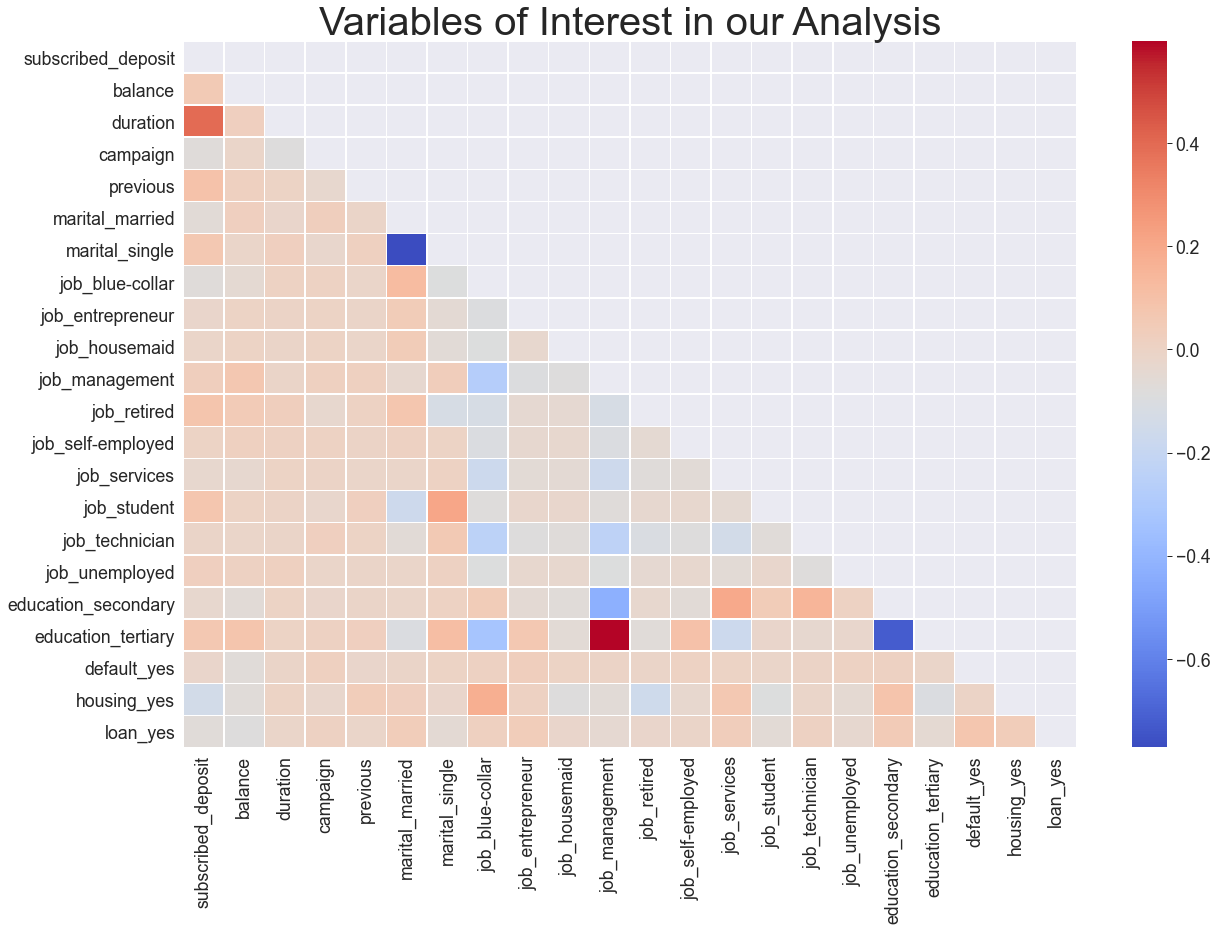

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   
sns.set(rc={'figure.figsize':(10,13)}, font_scale = 2)

corr = x_train.corr()
plt.figure(figsize=(20,13))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_context("paper", font_scale=2)
plt.title('Variables of Interest in our Analysis', fontsize=40)
sns.heatmap(x_train.corr(),annot=False, linewidth=.5, cmap="coolwarm", mask=mask)

### Linear Regression

In [79]:
import statsmodels.api as sm

#Regression Model
x_train = sm.add_constant(x_train)# adding a constant
x_test = sm.add_constant(x_test)
model=sm.OLS(y_train, x_train).fit()
model.summary()

/Users/Mango/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_yes   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     471.5
Date:                Wed, 30 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:11:57   Log-Likelihood:                -6958.8
No. Observations:               40430   AIC:                         1.396e+04
Df Residuals:                   40407   BIC:                         1.416e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0237      0.011      2.083      0.037       0.001       0.046
age                     0.0004      0.000      2.334      0.020    6.54e-05       0.001
balance              2.323e-06   4.76e-07      4.881      0.000    1.39e-06    3.26e-06
duration                0.0005   5.57e-06     87.444      0.000       0.000       0.000
campaign               -0.0036      0.000     -7.845      0.000      -0.005      -0.003
previous                0.0124      0.001     20.275      0.000       0.011       0.014
marital_married        -0.0083      0.005     -1.801      0.072      -0.017       0.001
marital_single          0.0205      0.005      3.816      0.000       0.010       0.031
job_blue-collar        -0.0361      0.005     -6.586      0.000      -0.047      -0.025
job_entrepreneur       -0.0459      0.009     -5.026      0.000      -0.064      -0.028
job_housemaid          -0.0471      0.010     -4.746      0.000      -0.067      -0.028
job_management         -0.0247      0.006     -4.070      0.000      -0.037      -0.013
job_retired             0.0514      0.009      6.050      0.000       0.035       0.068
job_self-employed      -0.0349      0.009     -3.930      0.000      -0.052      -0.017
job_services           -0.0302      0.006     -4.780      0.000      -0.043      -0.018
job_student             0.1117      0.011     10.024      0.000       0.090       0.134
job_technician         -0.0259      0.006     -4.702      0.000      -0.037      -0.015
job_unemployed         -0.0079      0.009     -0.839      0.402      -0.027       0.011
education_secondary     0.0132      0.005      2.899      0.004       0.004       0.022
education_tertiary      0.0449      0.006      7.801      0.000       0.034       0.056
default_yes            -0.0217      0.011     -2.003      0.045      -0.043      -0.000
housing_yes            -0.0787      0.003    -25.855      0.000      -0.085      -0.073
loan_yes               -0.0402      0.004    -10.167      0.000      -0.048      -0.032
==============================================================================
Omnibus:                    13065.520   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44296.602
Skew:                           1.639   Prob(JB):                         0.00
Kurtosis:                       6.943   Cond. No.                     3.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
pvalues_df = pd.DataFrame(model.pvalues)
pvalues_df.reset_index(inplace=True)
pvalues_df.rename(columns={"index": "Variables", 0: "Pvalues"}, inplace=True)

#Creates new dataframe for all significant variables
df_significant = pvalues_df.loc[pvalues_df['Pvalues'] < .05]
df_significant.reset_index(inplace=True, drop=True)
df_significant['Pvalues'] = df_significant['Pvalues'].apply(lambda x: '%.5f' % x)
df_significant

/Users/Mango/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variables,Pvalues
0,const,0.00000
1,subscribed_deposit,0.01960
2,balance,0.00000
3,duration,0.02498
4,previous,0.00061
5,marital_married,0.00000
6,marital_single,0.00000
7,job_blue-collar,0.00000
8,job_entrepreneur,0.00000
9,job_housemaid,0.00000


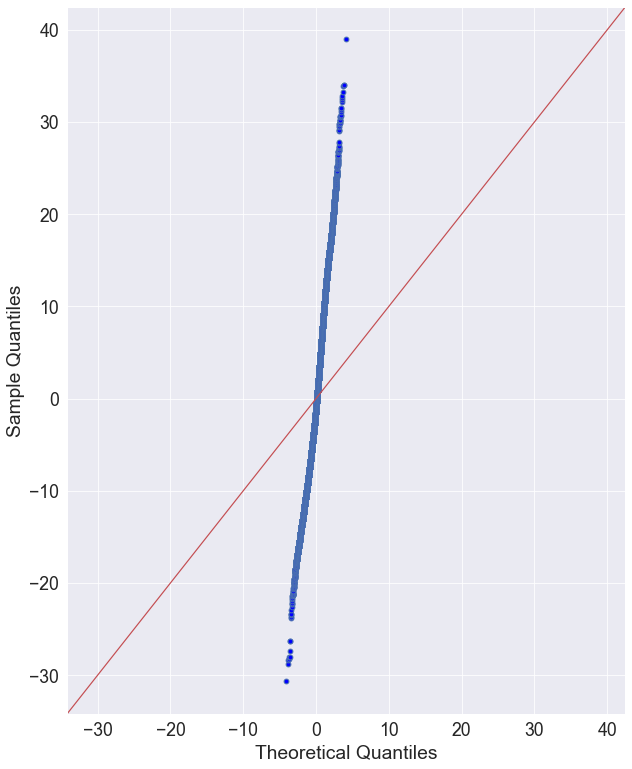

In [16]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py 
  
# np.random generates different random numbers 
# whenever the code is executed 
# Note: When you execute the same code  
# the graph look different than shown below. 
  
# Random data points generated 
data_points = model.resid   
  
sm.qqplot(data_points, line ='45') 
py.show() 

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Train the model
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

# Compute the root-mean-square
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

8.440115962930982


### Cross Val

In [ ]:
from sklearn.model_selection import cross_val_score
MSEs = cross_val_score(lm, x_train, y=y_train, scoring='neg_mean_squared_error', cv=10)
RMSE = (MSEs*-1)**0.5
print(RMSE)

In [ ]:
sns.set(style='ticks')
sns.regplot(y_test, y=y_pred, scatter_kws={'alpha':0.5});
plt.title('Prediction Performance for Age')
plt.ylabel('Age')
plt.xlabel('Trained Regression')

## Validate Model

In [ ]:
from sklearn.base import clone
import seaborn as sns

def Linear_Regression_Feature_Importance(model, x_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(x_train, y_train)
    MSEs = cross_val_score(model, x_train, y=y_train, scoring='neg_mean_squared_error', cv=2)[0]
    RMSE = (MSEs*-1)**0.5
    benchmark_score = RMSE
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in x_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(x_train.drop(col, axis = 1), y_train)
        MSEs_drop = cross_val_score(model, x_train.drop(col, axis = 1), y=y_train, scoring='neg_mean_squared_error', cv=2)[0]
        drop_col_score = (MSEs_drop*-1)**0.5 
        importances.append(drop_col_score - benchmark_score)
    
    importances_df = pd.DataFrame({'Features': x_train.columns, 'Importance' : importances})
    importances_df.sort_values(by= ['Importance'], ascending=False, inplace=True)
    importances_df.reset_index(drop=True, inplace=True)
    
    return importances_df

In [ ]:
MSEs_drop = cross_val_score(lm, x_train.drop(col, axis = 1), y=y_train, scoring='neg_mean_squared_error', cv=2)[0]
drop_col_score = (MSEs_drop*-1)**0.5 
drop_col_score

In [ ]:
Linear_Regression_Feature_Importance(lm, x_train, y_train, random_state = 42)

In [ ]:
cleaned_data['previous'].value_counts()

In [ ]:
cleaned_data

In [ ]:
numeric_column_list = ['balance', 'campaign', 'duration', 'previous']

In [40]:
cleaned_data.columns

Index(['subscribed_deposit', 'age', 'balance', 'duration', 'campaign',
       'previous', 'marital_married', 'marital_single', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes'],
      dtype='object')

In [ ]:
target_col_name = 'age'

In [ ]:
cleaned_data_y = cleaned_data.loc[:, cleaned_data.columns == target_col_name]

In [91]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import numpy as np

def test(model, cleaned_data, target_col_name, numeric_column_list, test_size, iterations=100):

    #Split Data into training and testing groups
    #We will have to standardize the numeric independent variables    
    cleaned_data_y = cleaned_data.loc[:, cleaned_data.columns == target_col_name]
    cleaned_data_x = cleaned_data.loc[:, cleaned_data.columns != target_col_name]

    x_train, x_test, y_train, y_test = train_test_split(cleaned_data_x, cleaned_data_y, test_size=test_size, random_state= 1254)

    scalar = sklearn.preprocessing.StandardScaler()

    scalar_x_train_numeric = pd.DataFrame(scalar.fit_transform(x_train[numeric_column_list]), index=x_train[numeric_column_list].index, columns=numeric_column_list)
    scalar_x_test_numeric = pd.DataFrame(scalar.transform(x_test[numeric_column_list]), index = x_test.index, columns=numeric_column_list)

    #Merge standardized numerical independent variables with categorical independent variables
    x_train_complete = pd.merge(scalar_x_train_numeric, x_train[x_train.columns.difference(numeric_column_list)], how = 'left', left_index=True, right_index=True)
    x_test_complete = pd.merge(scalar_x_test_numeric, x_test[x_test.columns.difference(numeric_column_list)], how = 'left', left_index=True, right_index=True)
    
    model = model
    model.fit(x_train_complete, y_train)
    
    lasso_params = {'alpha':np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])}
    ridge_params = {'alpha':np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])}
    
#     #models = {'OLS': linear_model.LinearRegression().fit(x_train, y_train),
#             'Lasso': GridSearchCV(linear_model.Lasso(), 
#                                param_grid=lasso_params).fit(x_train, y_train).best_estimator_,
#             'Ridge': GridSearchCV(linear_model.Ridge(), 
#                                param_grid=ridge_params).fit(x_train, y_train).best_estimator_,}
    
    
#     grid1 = GridSearchCV(linear_model.LinearRegression(), scoring='neg_mean_squared_error', cv=2)
#     grid1_result = grid.fit(x_train, y_train)
#     print('Best Score: ', grid1_result.best_score_)
    
    Lasso_CV = GridSearchCV(linear_model.Lasso(), 
                            param_grid=lasso_params, scoring='neg_mean_squared_error', cv=2).fit(x_train, y_train)
    print('Best Score: ', abs(Lasso_CV.best_score_)**0.5)
    print('\n')
    print('The Best Penalty:', Lasso_CV.best_estimator_.get_params()['alpha'])
    print('\n')
    
    Ridge_CV = GridSearchCV(linear_model.Ridge(), 
                            param_grid=ridge_params, scoring='neg_mean_squared_error', cv=2).fit(x_train, y_train)
    print('Best Score: ', abs(Ridge_CV.best_score_)**0.5)
    print('\n')
    print('The Best Penalty:', Ridge_CV.best_estimator_.get_params()['alpha'])
    
    model4 = sm.OLS(y_train, x_train_complete)
    model4_summary = model4.fit_regularized(method='elastic_net', alpha=0.001, L1_wt=1.0)
    print(model4_summary.summary())
    
#     results = {}
#     for i in models:
#         mse_train = []
#         mse_test = []
#         alpha = []
#         for j in range(iterations):
#             mse_test.append(metrics.mean_squared_error(y_test,
#                                             models[i].fit(x_train_complete, 
#                                                          y_train).predict(x_test))**2)
#             mse_train.append(metrics.mean_squared_error(y_train, 
#                                              models[i].fit(x_train_complete, 
#                                                           y_train).predict(x_train))**2)
#     return pd.DataFrame(results)

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix

logreg = LogisticRegression()
grid={"C":np.array([0.001, 0.01, 0.1,.5, 1, 1.5, 3 , 5, 10]), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(logreg,grid,cv=2)
logreg_cv.fit(x_train,y_train)
print('The Best Penalty:',.best_estimator_.get_params()['penalty'])
print('The Best C:', logreg_cv.best_estimator_.get_params()['C'])

SyntaxError: invalid syntax (<ipython-input-76-b4095b99ba3e>, line 13)

In [92]:
test(LinearRegression(), cleaned_data, 'age', ['balance', 'campaign', 'duration'], 0.1)

Best Score:  8.184015667373828


The Best Penalty: 0.001


Best Score:  8.184104023278312


The Best Penalty: 1.0


NotImplementedError: 

In [109]:
results_fr.summary

<bound method Results.summary of <statsmodels.base.elastic_net.RegularizedResults object at 0x7f87a0be05f8>>

In [102]:
model = sm.OLS(y_train, x_train)
results_fu = model.fit()

results_fr = model.fit_regularized(L1_wt=0, alpha=0.01, start_params=results_fu.params)
results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)

final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
print(final.summary())
print(print('Best Score: ', abs(results_fr.best_score_)**0.5))

                            OLS Regression Results                            
Dep. Variable:                  y_yes   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     470.0
Date:                Wed, 30 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:32:30   Log-Likelihood:                -6971.8
No. Observations:               40430   AIC:                         1.399e+04
Df Residuals:                   40407   BIC:                         1.419e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0146    

AttributeError: 'RegularizedResults' object has no attribute 'best_score_'

In [82]:
import statsmodels.api as sm

#Regression Model
x_train = sm.add_constant(x_train)# adding a constant
x_test = sm.add_constant(x_test)

model = sm.OLS(y_train, x_train)
results_fu = model.fit()
results_fr_fit = model.fit_regularized(method='elastic_net', alpha=0.001, L1_wt=1.0, start_params=results_fu.params)
final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
print(results.sm.base.elastic_net.RegularizedResults)

/Users/Mango/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


AttributeError: 'RegularizedResults' object has no attribute 'sm'

In [109]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

lasso_params = {'alpha':np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])}
ridge_params = {'alpha':np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])}

Apply standard scalar
#Not Needed fo logistic Regression
import sklearn
from sklearn.preprocessing import StandardScaler

scalar = sklearn.preprocessing.StandardScaler()
numeric_col_names = 
scalar_x_train_numeric = pd.DataFrame(scalar.fit_transform(x_train_numeric), index =x_train_numeric.index, columns= )
scalar_x_test_numeric = pd.DataFrame(scalar.transform(x_test_numeric), index = x_test_numeric.index, columns=])

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(x_train, y_train).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(x_train, y_train).best_estimator_,}


SyntaxError: invalid syntax (<ipython-input-109-589dc5237628>, line 8)

In [ ]:
test(models2)

## Logistic Regression

In [26]:
import pandas as pd

cleaned_data_x = pd.read_csv('cleaned_X.csv')
cleaned_data_x.drop('Unnamed: 0', 1, inplace=True)
cleaned_data_y=pd.read_csv('cleaned_Y.csv')
cleaned_data_y.drop('Unnamed: 0', 1, inplace=True)
cleaned_data_y.head()

,y_yes
0,0
1,0
2,0
3,0
4,0


In [27]:
#Split Data into training and testing groups
#We will have to standardize the numeric independent variables
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cleaned_data_x, cleaned_data_y, test_size=0.1, random_state= 1254)

In [28]:
#Begin fitting regression model
import statsmodels.api as sm
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = sm.Logit(y_train, x_train)
result=logmodel.fit()
print(result.summary())
## P values greater than .05 are not significant

Optimization terminated successfully.
         Current function value: 0.279710
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                40430
Model:                          Logit   Df Residuals:                    40408
Method:                           MLE   Df Model:                           21
Date:                Wed, 30 Dec 2020   Pseudo R-squ.:                  0.2278
Time:                        18:38:24   Log-Likelihood:                -11309.
converged:                       True   LL-Null:                       -14645.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0287      0.001    -19.896      0.000      -0.032      -0.026
ba

In [29]:
pvalues_df = pd.DataFrame(result.pvalues)
pvalues_df.reset_index(inplace=True)
pvalues_df.rename(columns={"index": "Variables", 0: "Pvalues"}, inplace=True)

#Creates new dataframe for all significant variables
df_significant = pvalues_df.loc[pvalues_df['Pvalues'] < .05]
df_significant.reset_index(inplace=True, drop=True)
df_significant['Pvalues'] = df_significant['Pvalues'].apply(lambda x: '%.5f' % x)
df_significant

/Users/Mango/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variables,Pvalues
0,age,0.00000
1,balance,0.00005
2,duration,0.00000
3,campaign,0.00000
4,previous,0.00000
5,marital_married,0.00000
6,marital_single,0.00000
7,job_blue-collar,0.00000
8,job_entrepreneur,0.00000
9,job_housemaid,0.00000


In [30]:
### Basic Feature Analysis

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


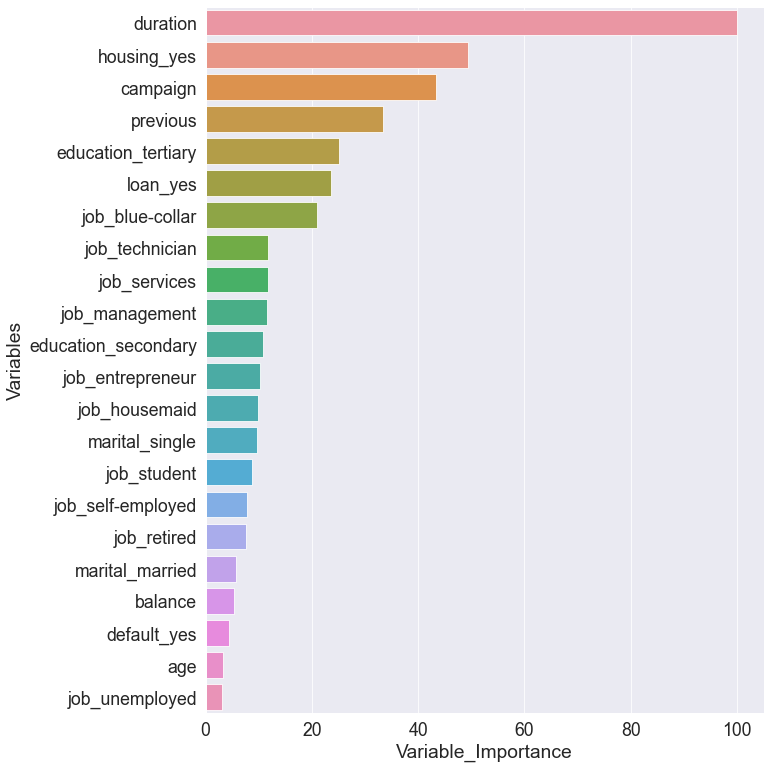

In [31]:
import numpy as np    
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

#Scale your data
scaler = StandardScaler()
scaler.fit(x_train) 
x_scaled = pd.DataFrame(scaler.transform(x_train),columns = x_train.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(x_scaled, y_train)

feature_importance = abs(clf.coef_[0])

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

df = pd.DataFrame(feature_importance, x_train.columns)
df.reset_index(inplace=True)
df.rename(columns={"index": "Variables", 0: "Variable_Importance"}, inplace=True)
df.sort_values(by=['Variable_Importance'], ascending=False, inplace=True)

Feature_Importance_Lasso = sns.barplot(x="Variable_Importance", y="Variables", data=df)

## Lasso regularization

In [32]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(x_test, y_test)))

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.8918


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3912,   83],
       [ 403,   95]])

In [34]:
##Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8918317382595148

### Optimum Threshhold

In [35]:
###Check ROC Curve for optimum threshhold

In [36]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
515,0.209011,0.791165,0.790989,0.000176,0.117954


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix

logreg = LogisticRegression()
grid={"C":np.array([0.001, 0.01, 0.1,.5, 1, 1.5, 3 , 5, 10]), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(logreg,grid,cv=2)
logreg_cv.fit(x_train,y_train)
print('The Best Penalty:', logreg_cv.best_estimator_.get_params()['penalty'])
print('The Best C:', logreg_cv.best_estimator_.get_params()['C'])

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Best Penalty: l2
The Best C: 5.0


In [38]:
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(penalty='l1', C=1.5)
logreg.fit(x_train, y_train)
THRESHOLD = 0.38
preds = np.where(logreg.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy : {:.4f}'.format(accuracy_score(y_test, preds)))

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.8927


In [ ]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = logreg.predict_proba(x_test)[:,1]
bins = np.arange(0, 1, 0.005).tolist()
plt.hist(a, bins)
plt.title("histogram") 
plt.show()

In [ ]:
accuracy=[]
for i in range(0,100):
    preds = np.where(logreg.predict_proba(x_test)[:,1] > (0.01 * i), 1, 0)
    accuracy.append(accuracy_score(y_test, preds))

In [ ]:
accuracy.index(max(accuracy)), max(accuracy)

In [ ]:
plt.bar(list(range(0,100)), accuracy, label="Data 1")
plt.legend()

# The following commands add labels to our figure.
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Vertical Bar chart')

plt.show()

## Random Forest Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(x_train, y_train)
# predictions
rfc_predict = rfc.predict(x_test)

In [ ]:
from sklearn.base import clone
import seaborn as sns

def RFC_Feature_Importance(model, x_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(x_train, y_train)
    benchmark_score = model_clone.score(x_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in x_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(x_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(x_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = pd.DataFrame({'Features': x_train.columns, 'Importance' : importances})
    importances_df.sort_values(by= ['Importance'], ascending=False, inplace=True)
    importances_df.reset_index(drop=True, inplace=True)
    
    return importances_df

In [ ]:
importances_df = RFC_Feature_Importance(rfc, x_train, y_train, random_state=42)

In [ ]:
Feature_Importance_RFC = sns.barplot(x="Importance", y="Features", data=importances_df)

## Logistic Regression Example
[Go back to the Table of Contents](#Contents)

In [ ]:
logmodel = sm.Logit(y_train,x_train)
result=logmodel.fit()
result.bse

In [ ]:
result.bse

In [ ]:
#Begin fitting regression model
import statsmodels.api as sm
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = sm.Logit(y_train,x_train)
result=logmodel.fit()
print(result.summary())
## P values greater than .05 are not significant

In [ ]:
#Begin fitting regression model
import statsmodels.api as sm
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
sk_res = logmodel.fit(x_train, y_train)
sk_predictions = logmodel.predict(x_test)

### Cross Validation

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, sk_predictions)
cm

In [ ]:
#This creates confusion matrix visualization

import matplotlib.pylab as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

In [ ]:
plot_confusion_matrix(cm, classes=['0','1'], normalize=False)

In [ ]:
##Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, sk_predictions)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_test, sk_predictions, average='macro')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(x_train, y_train)
# predictions
rfc_predict = rfc.predict(x_test)

In [ ]:
cm2 = confusion_matrix(y_test, rfc_predict)
cm2

In [ ]:
plot_confusion_matrix(cm2, classes=['0','1'], normalize=False)

In [ ]:
##Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rfc_predict)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_test, rfc_predict, average='macro')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))